
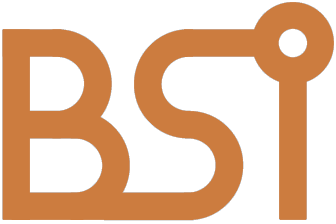

## Sistema de Acompanhamento de Benefícios e Registros de Favelas (SABREN)

### Origem
- **Início**: 1979 pelo IPLANRIO.
- **Objetivo**: Fornecer dados para urbanização, saneamento e regularização das favelas no Rio de Janeiro.

### Metodologia
- **Levantamento de Dados**:
  - Questionários com 107 perguntas.
  - Mapeamento das favelas em escala 1:2.000.
  - Cadastro inicial de 377 favelas.

### Evolução
- **1982-1984**: Modernização para um sistema computadorizado com 71 itens em 5 dimensões:
  1. Identificação
  2. Infraestrutura e serviços
  3. Equipamentos comunitários
  4. Organização da comunidade
  5. Situação fundiária

- **1985**: Revisão da metodologia e cadastramento de mais 14 favelas.
- **1988**: Reconhecimento formal das favelas na legislação urbanística e cadastramento de 21 novas favelas.

### Importância
O SABREN desempenhou um papel crucial no planejamento urbano e na inclusão social das comunidades de favela na cidade.


In [1]:
# Célula 1: Importando bibliotecas
import pandas as pd


In [2]:
domicilios = 'Domicílios.xls'

dfs = pd.read_excel(domicilios, sheet_name=None, header=None)


In [3]:
for aba, df in dfs.items():
    df.columns = df.iloc[4]

    df = df[6:].copy()

    df.dropna(how='all', inplace=True)

    df.iloc[:, 0] = pd.to_numeric(df.iloc[:, 0], errors='coerce')

    df = df.dropna(subset=[df.columns[0]])

    df.reset_index(drop=True, inplace=True)

    df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

    nome_arquivo = f'{aba}.xlsx'
    df.to_excel(nome_arquivo, index=False)

    print(f'DataFrame da aba "{aba}" salvo como "{nome_arquivo}".')


DataFrame da aba "Domicílios Condição Ocup" salvo como "Domicílios Condição Ocup.xlsx".
DataFrame da aba "Domicílios Tipo" salvo como "Domicílios Tipo.xlsx".
DataFrame da aba "Domicílios Espécie" salvo como "Domicílios Espécie.xlsx".
DataFrame da aba "Domicílios Moradores" salvo como "Domicílios Moradores.xlsx".
DataFrame da aba "Domicílios Banheiros" salvo como "Domicílios Banheiros.xlsx".
DataFrame da aba "Domicílios água" salvo como "Domicílios água.xlsx".
DataFrame da aba "Domicílios Lixo" salvo como "Domicílios Lixo.xlsx".
DataFrame da aba "Domicílios Esgotamento" salvo como "Domicílios Esgotamento.xlsx".
DataFrame da aba "Domicílios Energia Elétrica" salvo como "Domicílios Energia Elétrica.xlsx".


In [4]:
import os



In [5]:
for aba in dfs.keys():
    nome_arquivo = f'{aba}.xlsx'

    if os.path.exists(nome_arquivo):
        df_salvo = pd.read_excel(nome_arquivo)
        #print(f'Aba: {aba}')
        #print(df_salvo.describe())
        #print('\n')

In [6]:
domicilios_saneamento = 'Domicílios Banheiros.xlsx'

df = pd.read_excel(domicilios_saneamento)


In [7]:
# Estilizando o DataFrame
df_estilizado = df.tail(10).style.set_table_attributes('style="width: 40%; margin: auto;"') \
                    .set_caption("Saneamento Básico por Domicílio") \
                    .set_table_styles(
                        [{'selector': 'th',
                          'props': [('background-color', '#8cc35d'),
                                    ('color', 'white'),
                                    ('font-weight', 'bold')]},
                         {'selector': 'td',
                          'props': [('padding', '10px'),
                                    ('border', '1px solid #ddd')]}]
                    ).set_properties(**{'text-align': 'center'})

# Exibir o DataFrame estilizado
df_estilizado

,Codigo da favela,Nome da favela,TotalGeral,1 banheiro,2 banheiros,3 banheiros,4 banheiros,5 banheiros,6 banheiros,7 banheiros,8 banheiros,9 banheiros,Sem banheiro exclusivo
832,1065,Travessa do Jagunço,26.000000,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
833,1066,Vila Esperança (RA - Realengo),141.000000,118.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
834,1067,Drª. Maria Estrela,38.000000,31.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
835,1070,Recanto dos Pássaros,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
836,1071,Pousada dos Cavalheiros,18.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
837,1075,Comunidade Vila do Pinheiro,108.000000,98.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
838,1076,Avenida Canal,105.000000,94.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
839,1077,Avenida Canal II,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
840,1081,Comunidade do Ecoponto,32.000000,28.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
841,1104,Higienópolis,423.000000,341.000000,65.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000


In [8]:
domicilios_energia = 'Domicílios Energia Elétrica.xlsx'

df = pd.read_excel(domicilios_energia)


In [9]:
# Estilizando o DataFrame
df_estilizado_2 = df.tail(10).style.set_table_attributes('style="width: 40%; margin: auto;"') \
                    .set_caption("Consumo de Energia Elétrica por Domicílio") \
                    .set_table_styles(
                        [{'selector': 'th',
                          'props': [('background-color', '#239dce'),
                                    ('color', 'white'),
                                    ('font-weight', 'bold')]},
                         {'selector': 'td',
                          'props': [('padding', '10px'),
                                    ('border', '1px solid #ddd')]}]
                    ).set_properties(**{'text-align': 'center'})

# Exibir o DataFrame estilizado
df_estilizado_2

,Codigo da favela,Nome da favela,TotalGeral,(Com medidor) Uso exclusivo do domicílio,(Com medidor) Comum a mais de um domicílio,(Companhia Distribuidora) Sem medidor,Outras fontes,Sem energia elétrica
832,1065,Travessa do Jagunço,26.000000,23.000000,2.000000,1.000000,0.000000,0.000000
833,1066,Vila Esperança (RA - Realengo),141.000000,8.000000,1.000000,131.000000,0.000000,1.000000
834,1067,Drª. Maria Estrela,38.000000,36.000000,2.000000,0.000000,0.000000,0.000000
835,1070,Recanto dos Pássaros,nan,nan,nan,nan,nan,nan
836,1071,Pousada dos Cavalheiros,18.000000,5.000000,0.000000,0.000000,12.000000,1.000000
837,1075,Comunidade Vila do Pinheiro,108.000000,14.000000,2.000000,90.000000,2.000000,0.000000
838,1076,Avenida Canal,105.000000,13.000000,7.000000,79.000000,6.000000,0.000000
839,1077,Avenida Canal II,5.000000,3.000000,2.000000,0.000000,0.000000,0.000000
840,1081,Comunidade do Ecoponto,32.000000,1.000000,1.000000,30.000000,0.000000,0.000000
841,1104,Higienópolis,423.000000,291.000000,120.000000,10.000000,2.000000,0.000000


In [10]:
domicilios_lixo = 'Domicílios Lixo.xlsx'

df = pd.read_excel(domicilios_lixo)

In [11]:
# Estilizando o DataFrame
df_estilizado = df.tail(10).style.set_table_attributes('style="width: 40%; margin: auto;"') \
                    .set_caption("Serviço de Coleta de Lixo por Domicílio") \
                    .set_table_styles(
                        [{'selector': 'th',
                          'props': [('background-color', '#ce8623'),
                                    ('color', 'white'),
                                    ('font-weight', 'bold')]},
                         {'selector': 'td',
                          'props': [('padding', '10px'),
                                    ('border', '1px solid #ddd')]}]
                    ).set_properties(**{'text-align': 'center'})

# Exibir o DataFrame estilizado
df_estilizado

,Codigo da favela,Nome da favela,TotalGeral,Serviço de limpeza,Caçamba por serviço de limpeza,Queimado na propriedade,Enterrado na propriedade,Jogado em terreno baldio ou logradouro,"Jogado em rio, lago ou mar",Outro destino
832,1065,Travessa do Jagunço,26.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
833,1066,Vila Esperança (RA - Realengo),141.000000,141.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
834,1067,Drª. Maria Estrela,38.000000,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000
835,1070,Recanto dos Pássaros,nan,nan,nan,nan,nan,nan,nan,nan
836,1071,Pousada dos Cavalheiros,18.000000,5.000000,6.000000,3.000000,0.000000,0.000000,0.000000,4.000000
837,1075,Comunidade Vila do Pinheiro,108.000000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
838,1076,Avenida Canal,105.000000,83.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000
839,1077,Avenida Canal II,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
840,1081,Comunidade do Ecoponto,32.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
841,1104,Higienópolis,423.000000,423.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Para garantir que as visualizações sejam exibidas corretamente no notebook
%matplotlib inline


In [13]:
# Calcular o índice total de lixo
df['Lixo Consumido de Forma Inadequada'] = (df['Queimado na propriedade'] +
                    df['Enterrado na propriedade'] +
                    df['Jogado em terreno baldio ou logradouro'] +
                    df['Jogado em rio, lago ou mar'] +
                    df['Outro destino'])


# Obter as 10 favelas com maior índice total de lixo
top_favelas = df.nlargest(10, 'Lixo Consumido de Forma Inadequada')


<ipython-input-14-529da063a24c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nome da favela', y='Lixo Consumido de Forma Inadequada', data=top_favelas, palette='YlOrBr')


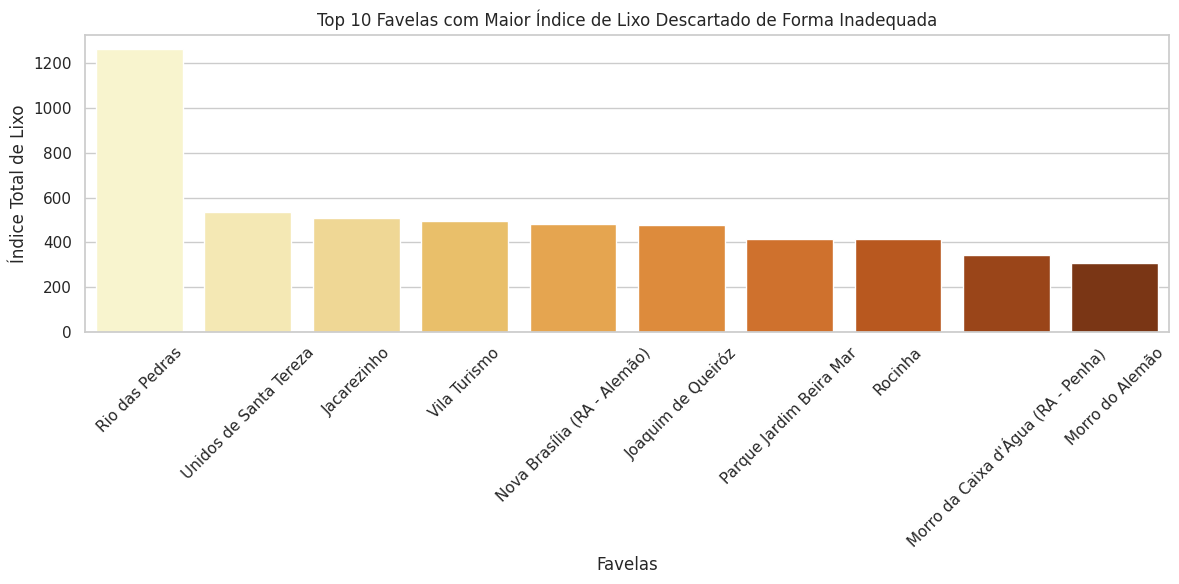

In [14]:
# Definir o estilo do gráfico
sns.set(style="whitegrid")

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Nome da favela', y='Lixo Consumido de Forma Inadequada', data=top_favelas, palette='YlOrBr')

# Adicionar título e rótulos
plt.title('Top 10 Favelas com Maior Índice de Lixo Descartado de Forma Inadequada')
plt.xlabel('Favelas')
plt.ylabel('Índice Total de Lixo')

# Exibir o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
domicilios_moradores = 'Domicílios Moradores.xlsx'

df = pd.read_excel(domicilios_moradores)

In [16]:
# Estilizando o DataFrame
df_estilizado = df.tail(10).style.set_table_attributes('style="width: 40%; margin: auto;"') \
                    .set_caption("Consumo de água por Domicílio") \
                    .set_table_styles(
                        [{'selector': 'th',
                          'props': [('background-color', '#0b9297'),
                                    ('color', 'white'),
                                    ('font-weight', 'bold')]},
                         {'selector': 'td',
                          'props': [('padding', '10px'),
                                    ('border', '1px solid #ddd')]}]
                    ).set_properties(**{'text-align': 'center'})

# Exibir o DataFrame estilizado
df_estilizado

,Codigo da favela,Nome da favela,TotalGeral,1 morador,2 moradores,3 moradores,4 moradores,5 moradores,6 moradores,7 moradores,8 moradores,9 moradores,10 ou mais moradores
832,1065,Travessa do Jagunço,26.000000,1.000000,9.000000,6.000000,5.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000
833,1066,Vila Esperança (RA - Realengo),141.000000,37.000000,33.000000,21.000000,24.000000,13.000000,7.000000,4.000000,1.000000,1.000000,0.000000
834,1067,Drª. Maria Estrela,38.000000,6.000000,10.000000,4.000000,14.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
835,1070,Recanto dos Pássaros,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
836,1071,Pousada dos Cavalheiros,18.000000,2.000000,2.000000,2.000000,7.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
837,1075,Comunidade Vila do Pinheiro,108.000000,10.000000,20.000000,20.000000,31.000000,14.000000,9.000000,2.000000,2.000000,0.000000,0.000000
838,1076,Avenida Canal,105.000000,16.000000,23.000000,26.000000,27.000000,8.000000,4.000000,1.000000,0.000000,0.000000,0.000000
839,1077,Avenida Canal II,5.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
840,1081,Comunidade do Ecoponto,32.000000,3.000000,7.000000,7.000000,7.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000
841,1104,Higienópolis,423.000000,64.000000,103.000000,93.000000,82.000000,51.000000,19.000000,4.000000,4.000000,3.000000,0.000000


In [17]:
# Agrupar os dados
df['Residencias Poucos Moradores'] = df[['1 morador', '2 moradores', '3 moradores']].sum(axis=1)
df['Residencias Muitos Moradores'] = df[['4 moradores', '5 moradores', '6 moradores',
                                          '7 moradores', '8 moradores', '9 moradores',
                                          '10 ou mais moradores']].sum(axis=1)

In [18]:
# Selecionar apenas os 15 primeiros registros
top_favelas = df.nlargest(15, 'TotalGeral')

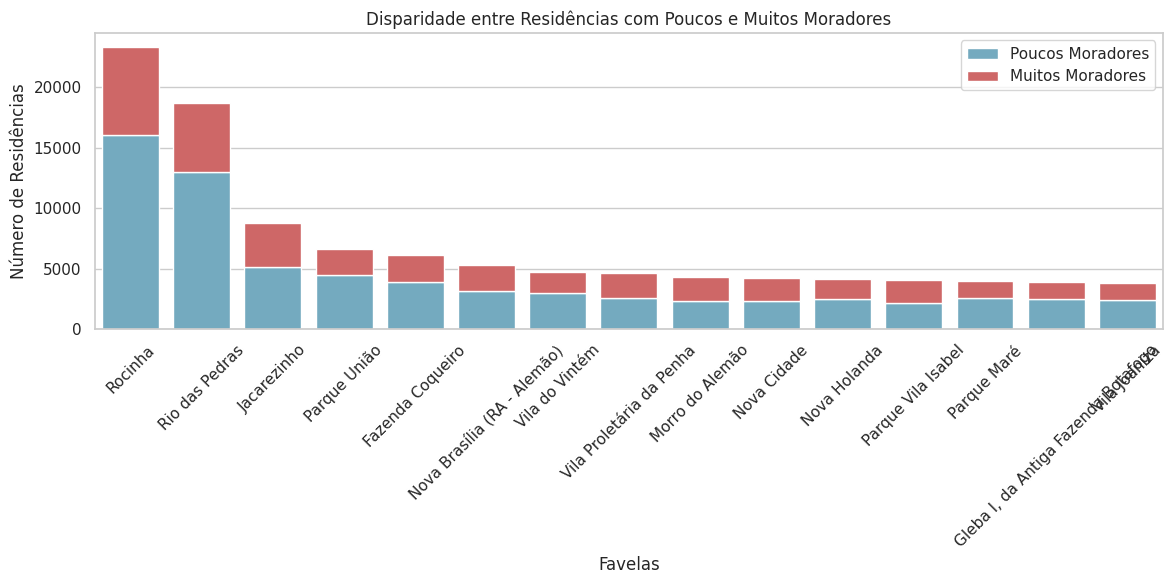

In [19]:
# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Nome da favela', y='Residencias Poucos Moradores', data=top_favelas, color='#68afcb', label='Poucos Moradores')
sns.barplot(x='Nome da favela', y='Residencias Muitos Moradores', data=top_favelas, color='#df5656', label='Muitos Moradores', bottom=top_favelas['Residencias Poucos Moradores'])

# Adicionar título e rótulos
plt.title('Disparidade entre Residências com Poucos e Muitos Moradores')
plt.xlabel('Favelas')
plt.ylabel('Número de Residências')
plt.legend()

# Exibir o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
#Base de dados do Índice de Progresso Social - IPS por Regiões Administrativas
#(RA) - Município do Rio de Janeiro - 2016/2018/2020/2022

dim = 'Dimensoes.xlsx'

dfs = pd.read_excel(dim, sheet_name=None, header=None)

In [21]:
import re

abas = [
    "Dimensões e Componentes 2016",
    "Dimensões e Componentes 2018",
    "Dimensões e Componentes 2020",
    "Dimensões e Componentes 2022"
]

for aba, df in dfs.items():
  if aba in abas:
      print(f'Aba: {aba}')

      if len(df) > 6:
          df.columns = df.iloc[6]
          df = df[7:].copy()
          df.reset_index(drop=True, inplace=True)


          # Filtrar para excluir linhas onde a primeira coluna é nula ou não corresponde ao padrão
          # Padrão: número romano de I a XXXIV seguido por qualquer nome da unidade administrativa
          # O regex vai capturar números romanos e qualquer texto depois
          padrao = r'^(I|II|III|IV|V|VI|VII|VIII|IX|X|XI|XII|XIII|XIV|XV|XVI|XVII|XVIII|XIX|XX|XXI|XXII|XXIII|XXIV|XXV|XXVI|XXVII|XXVIII|XXIX|XXX|XXXI|XXXII|XXXIII|XXXIV)\s+.*$'

          # Filtra para manter apenas linhas válidas na coluna 0
          df = df[df.iloc[:, 0].notnull() & df.iloc[:, 0].str.match(padrao)]

          nome_arquivo = f'{aba}.xlsx'
          df.to_excel(nome_arquivo, index=False)


Aba: Dimensões e Componentes 2016
Aba: Dimensões e Componentes 2018
Aba: Dimensões e Componentes 2020
Aba: Dimensões e Componentes 2022


In [22]:
for aba in dfs.keys():
    nome_arquivo = f'{aba}.xlsx'

    if os.path.exists(nome_arquivo):
        df_salvo = pd.read_excel(nome_arquivo)
        #print(f'Aba: {aba}')
        #print(df_salvo.describe())
        #print('\n')

In [23]:
ips2022 = 'Dimensões e Componentes 2022.xlsx'

df = pd.read_excel(ips2022)

In [24]:
# Estilizando o DataFrame
df_estilizado = df.style.set_table_attributes('style="width: 40%; margin: auto;"') \
                    .set_caption("Consumo de água por Domicílio") \
                    .set_table_styles(
                        [{'selector': 'th',
                          'props': [('background-color', '#0b9297'),
                                    ('color', 'white'),
                                    ('font-weight', 'bold')]},
                         {'selector': 'td',
                          'props': [('padding', '10px'),
                                    ('border', '1px solid #ddd')]}]
                    ).set_properties(**{'text-align': 'center'})

# Exibir o DataFrame estilizado
#df_estilizado

In [25]:
#Base de dados do Índice de Progresso Social - IPS por Regiões Administrativas
#(RA) - Município do Rio de Janeiro - 2016/2018/2020/2022

ips = 'IPS.xlsx'

dfs = pd.read_excel(ips, sheet_name=None, header=None)

In [27]:
import pandas as pd
import re

abas = [
    "Indicadores - 2016",
    "Indicadores - 2018",
    "Indicadores - 2020",
    "Indicadores - 2022"
]

for aba, df in dfs.items():
    if aba in abas:
        print(f'Aba: {aba}')

        if len(df) > 6:
            df.columns = df.iloc[4]
            df = df[6:].copy()
            df.reset_index(drop=True, inplace=True)

            # Filtrar para excluir linhas onde a primeira coluna é nula ou não corresponde ao padrão
            padrao = r'^(I|II|III|IV|V|VI|VII|VIII|IX|X|XI|XII|XIII|XIV|XV|XVI|XVII|XVIII|XIX|XX|XXI|XXII|XXIII|XXIV|XXV|XXVI|XXVII|XXVIII|XXIX|XXX|XXXI|XXXII|XXXIII|XXXIV)\s+.*$'

            # Filtra para manter apenas linhas válidas na coluna 0
            df = df[df.iloc[:, 0].notnull() & df.iloc[:, 0].str.match(padrao)]

            # Função para converter colunas em numéricas, ignorando %
            def convert_to_numeric(value):
                # Verifica se o valor é uma string
                if isinstance(value, str):
                    if '%' in value:
                        return value  # Retorna o valor original se contém %
                    else:
                        try:
                            return pd.to_numeric(value.replace(',', '.'), errors='coerce')  # Converte o valor, substituindo ',' por '.' para conversão
                        except ValueError:
                            return value  # Retorna o valor original se não for convertível
                elif isinstance(value, (int, float)):
                    return value  # Retorna o valor se já for numérico
                return value  # Retorna o valor original para outros tipos

            # Aplica a conversão a todas as colunas a partir da segunda
            df.iloc[:, 1:] = df.iloc[:, 1:].applymap(convert_to_numeric)

            nome_arquivo = f'{aba}.xlsx'
            df.to_excel(nome_arquivo, index=False)


Aba: Indicadores - 2016


<ipython-input-27-71fa4e1dbb16>:42: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.iloc[:, 1:] = df.iloc[:, 1:].applymap(convert_to_numeric)


Aba: Indicadores - 2018
Aba: Indicadores - 2020
Aba: Indicadores - 2022


In [28]:
ips_2022 = 'Indicadores - 2022.xlsx'

df = pd.read_excel(ips_2022)

In [30]:
# Estilizando o DataFrame
df_estilizado = df.sample(1).style.set_table_attributes('style="width: 40%; margin: auto;"') \
                    .set_caption("Consumo de água por Domicílio") \
                    .set_table_styles(
                        [{'selector': 'th',
                          'props': [('background-color', '#0b9297'),
                                    ('color', 'white'),
                                    ('font-weight', 'bold')]},
                         {'selector': 'td',
                          'props': [('padding', '10px'),
                                    ('border', '1px solid #ddd')]}]
                    ).set_properties(**{'text-align': 'center'})

# Exibir o DataFrame estilizado
df_estilizado

,Região Administrativa,Mortalidade na infância,Baixo peso ao nascer,Mortalidade materna,Internações infantis por crise respiratória aguda,Acesso à água canalizada,Acesso a esgotamento sanitário,Acesso a banheiro,População vivendo em Favelas não-urbanizadas,Acesso à energia elétrica,Adensamento habitacional excessivo,Taxa de homicídios,Roubos de rua,Alfabetização,"Qualidade do Ensino Fundamental, anos iniciais","Qualidade do Ensino Fundamental, anos finais",Abandono escolar no Ensino Médio,Acesso à telefone celular ou fixo,Acesso a internet,Mortalidade por doenças crônicas,Incidência de dengue,Mortalidade por tuberculose e HIV,Coleta seletiva de lixo,Degradação de áreas verdes,Mobilidade urbana,Homicídios por ação policial,Tempo médio de deslocamento,Participação política,Gravidez na adolescência,Trabalho infantil,Índice de acesso à cultura,Violência contra a mulher,Homicídios de jovens negros,Vulnerabilidade familiar,Pessoas com Ensino Superior,Negros e indígenas com Ensino Superior,Frequência ao Ensino Superior
25,XXVII ROCINHA,3.416078,0.114846,124.584718,2.730000,0.986900,0.842000,0.982600,0.999900,0.910500,0.109600,5.767345,0.160000,0.348600,5.200000,5.560000,0.000000,0.923900,0.403400,107.340313,5.767345,18.743872,0.000000,-0.023800,0.814263,0.000000,30.710000,0.252777,0.105042,0.000000,2.150000,157.160159,1.441836,0.042900,0.019200,0.021600,0.046400
